In [14]:
import os
import librosa  # Thư viện để tải và phân tích âm thanh
import numpy as np  # Để xử lý mảng số học
import pandas as pd  # Để tạo báo cáo CSV
import matplotlib.pyplot as plt  # Để vẽ biểu đồ

In [ ]:
DATASET_ROOT_DIR = "F:\\Deepfake-Audio-Detector\\datasets\\for-dataset\\"
MIN_DURATION_THRESHOLD_SEC = 1.0
AUDIO_FILE_EXTENSIONS = [".wav", ".flac", ".mp3", ".m4a"] 

# --- Thực hiện EDA thời lượng âm thanh ---
durations = []
audio_file_info_list = []
failed_to_process = []

print(f"Bắt đầu quét dataset và phân tích thời lượng âm thanh từ thư mục: {DATASET_ROOT_DIR}")
print(f"Ngưỡng thời lượng tối thiểu cho file 'ngắn': {MIN_DURATION_THRESHOLD_SEC} giây.")

Bắt đầu quét dataset và phân tích thời lượng âm thanh từ thư mục: F:\Deepfake-Audio-Detector\datasets\for-dataset\
Ngưỡng thời lượng tối thiểu cho file 'ngắn': 1.0 giây.


In [16]:
# Duyệt qua cấu trúc thư mục: <root>/<split>/<label>/<audio_file>
for split_type in ["train", "val", "test"]:
    split_path = os.path.join(DATASET_ROOT_DIR, split_type)
    
    if not os.path.isdir(split_path):
        print(f"Cảnh báo: Thư mục split '{split_path}' không tồn tại. Bỏ qua.")
        continue

    for label_type in ["fake", "real"]:
        label_path = os.path.join(split_path, label_type)
        if not os.path.isdir(label_path):
            print(f"Cảnh báo: Thư mục label '{label_path}' không tồn tại. Bỏ qua.")
            continue

        print(f"Đang quét thư mục: {label_path}")
        for filename in os.listdir(label_path):
            file_path = os.path.join(label_path, filename)

            if os.path.isfile(file_path) and any(filename.lower().endswith(ext) for ext in AUDIO_FILE_EXTENSIONS):
                try:
                    # Lấy thời lượng của file âm thanh mà không cần tải toàn bộ dữ liệu
                    duration = librosa.get_duration(path=file_path)
                    durations.append(duration)

                    # Trích xuất utterance_id từ tên file (bỏ phần mở rộng)
                    utterance_id = filename.split(".")[0]
                    utterance_id = utterance_id[4:]

                    file_info = {
                        "utterance_id": utterance_id,
                        "file_path": file_path,
                        "split": split_type,
                        "label": label_type,
                        "duration_sec": duration,
                    }
                    audio_file_info_list.append(file_info)

                except Exception as e:
                    print(f"Lỗi khi xử lý file {file_path}: {e}. Bỏ qua.")
                    failed_to_process.append(file_path)
            else:
                pass 

Đang quét thư mục: F:\Deepfake-Audio-Detector\datasets\for-dataset\train\fake
Đang quét thư mục: F:\Deepfake-Audio-Detector\datasets\for-dataset\train\real
Đang quét thư mục: F:\Deepfake-Audio-Detector\datasets\for-dataset\val\fake
Đang quét thư mục: F:\Deepfake-Audio-Detector\datasets\for-dataset\val\real
Đang quét thư mục: F:\Deepfake-Audio-Detector\datasets\for-dataset\test\fake
Đang quét thư mục: F:\Deepfake-Audio-Detector\datasets\for-dataset\test\real



--- Kết quả EDA thời lượng âm thanh ---
Tổng số file âm thanh đã phân tích thành công: 97425
Thời lượng trung bình: 3.60 giây
Thời lượng tối thiểu: 0.00 giây
Thời lượng tối đa: 39.81 giây
Thời lượng trung vị: 2.72 giây
Độ lệch chuẩn thời lượng: 2.38 giây

--- Các file dưới 1.0 giây ---
Tổng số file dưới 1.0 giây: 3860
  ID: 100, Split: train, Label: fake, Thời lượng: 0.70 giây, Đường dẫn: F:\Deepfake-Audio-Detector\datasets\for-dataset\train\fake\file100.mp3.wav_16k.wav_norm.wav_mono.wav_silence.wav
  ID: 10003, Split: train, Label: fake, Thời lượng: 0.98 giây, Đường dẫn: F:\Deepfake-Audio-Detector\datasets\for-dataset\train\fake\file10003.mp3.wav_16k.wav_norm.wav_mono.wav_silence.wav
  ID: 10014, Split: train, Label: fake, Thời lượng: 0.89 giây, Đường dẫn: F:\Deepfake-Audio-Detector\datasets\for-dataset\train\fake\file10014.mp3.wav_16k.wav_norm.wav_mono.wav_silence.wav
  ID: 1002, Split: train, Label: fake, Thời lượng: 0.89 giây, Đường dẫn: F:\Deepfake-Audio-Detector\datasets\for-dat

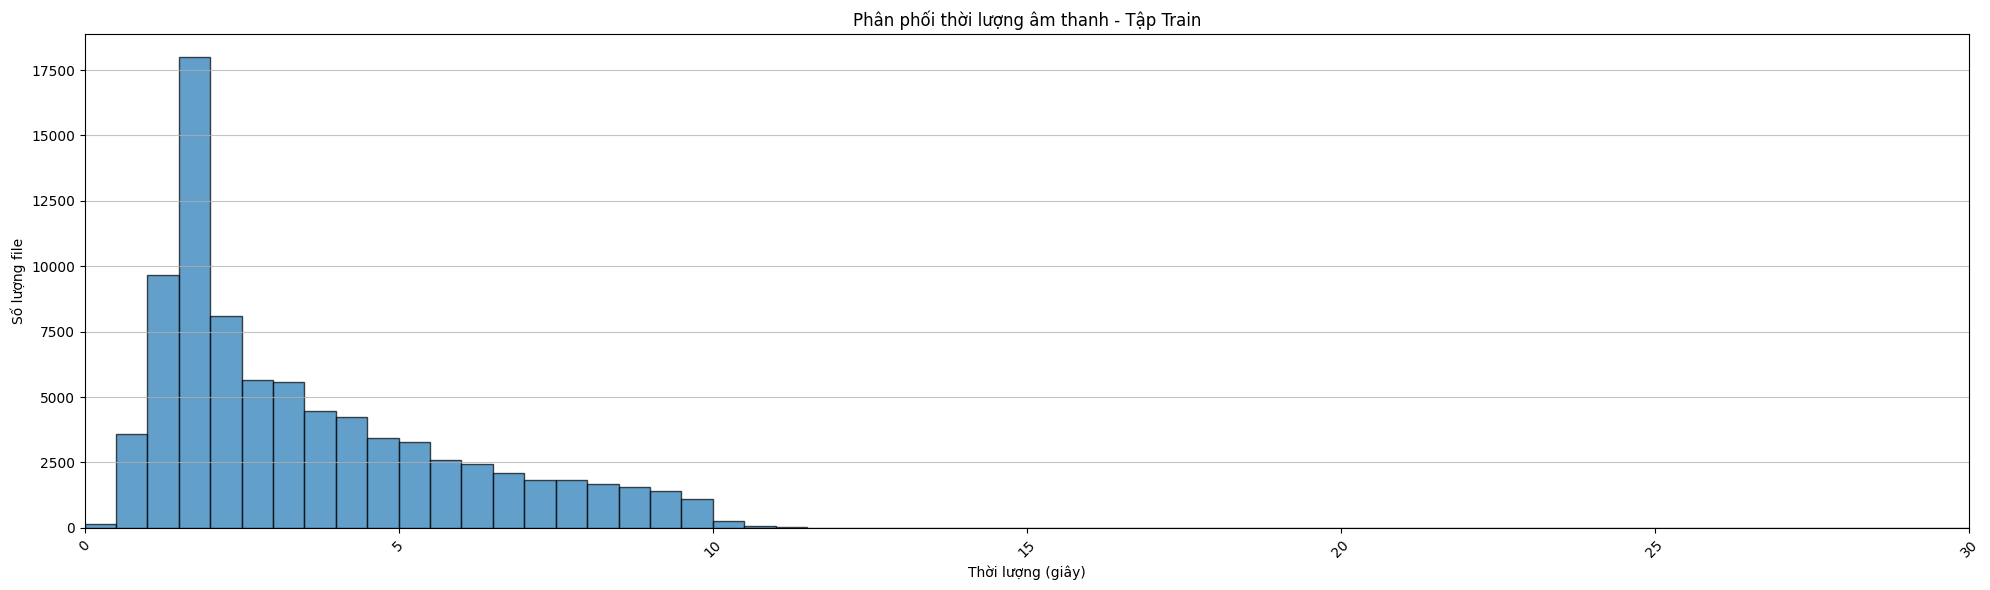

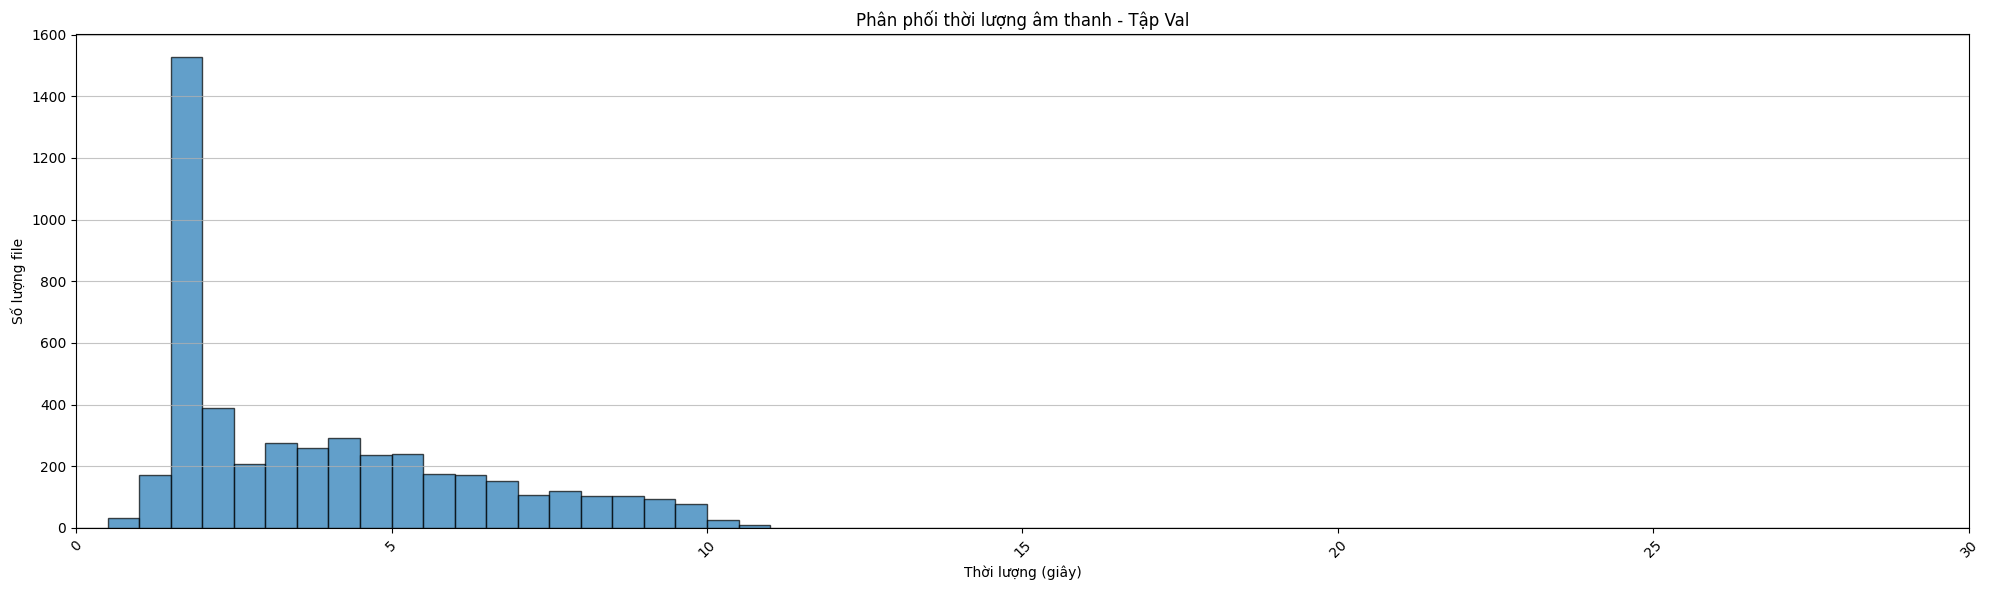

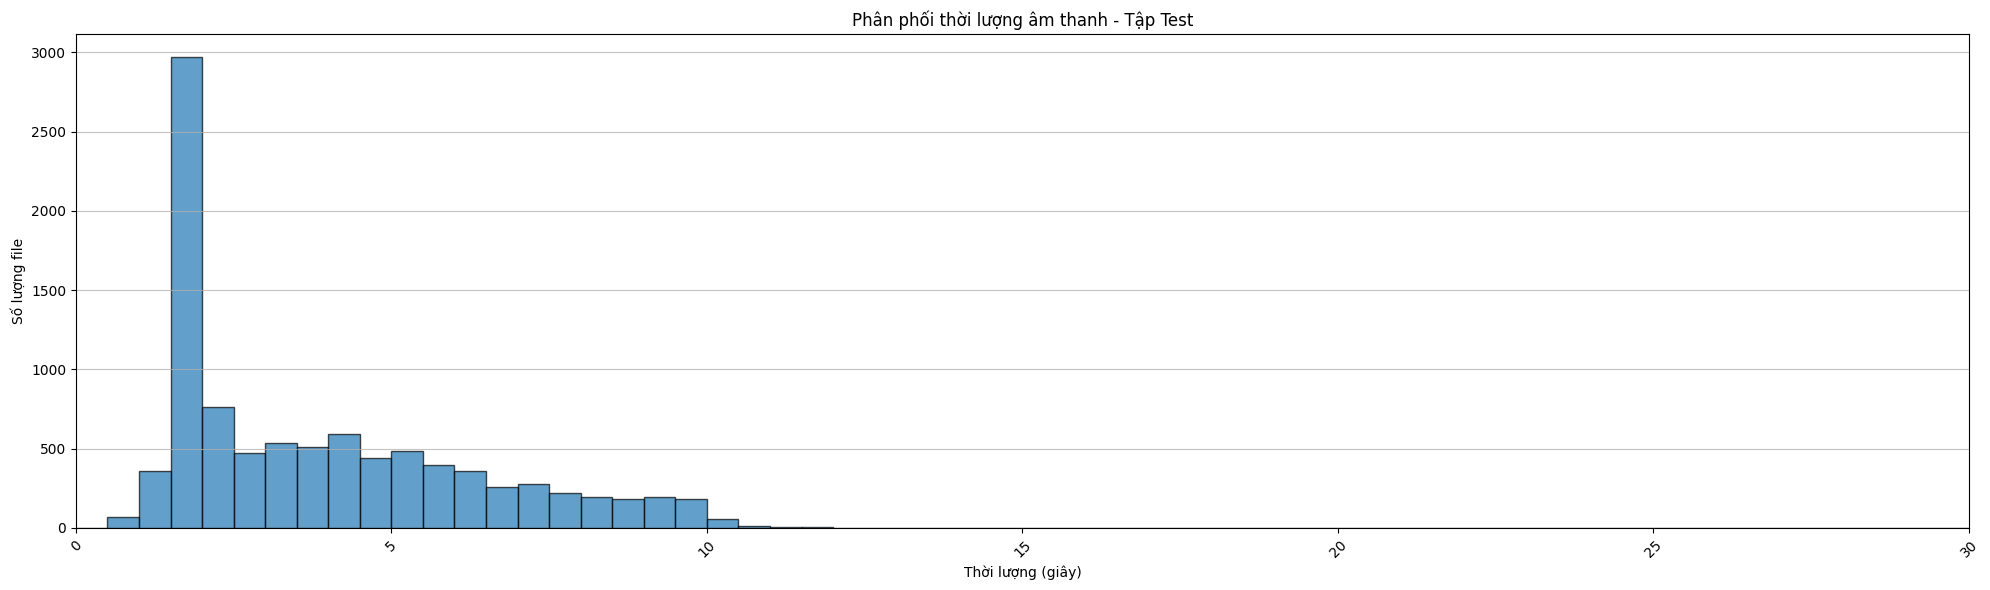


Quá trình EDA thời lượng hoàn tất.


In [ ]:
HISTOGRAM_BIN_SIZE = 0.5
MIN_PLOT_DURATION_SEC = 0.0  # Change this to 'a'
MAX_PLOT_DURATION_SEC = 30.0

print("\n--- Kết quả EDA thời lượng âm thanh ---")
if audio_file_info_list:
    # Chuyển đổi danh sách thông tin file thành DataFrame để dễ phân tích
    df_eda = pd.DataFrame(audio_file_info_list)

    durations_np = df_eda["duration_sec"].values
    print(f"Tổng số file âm thanh đã phân tích thành công: {len(durations_np)}")
    print(f"Thời lượng trung bình: {np.mean(durations_np):.2f} giây")
    print(f"Thời lượng tối thiểu: {np.min(durations_np):.2f} giây")
    print(f"Thời lượng tối đa: {np.max(durations_np):.2f} giây")
    print(f"Thời lượng trung vị: {np.median(durations_np):.2f} giây")
    print(f"Độ lệch chuẩn thời lượng: {np.std(durations_np):.2f} giây")

    # Lọc và hiển thị các file ngắn
    short_audio_files_df = df_eda[df_eda["duration_sec"] < MIN_DURATION_THRESHOLD_SEC]
    print(f"\n--- Các file dưới {MIN_DURATION_THRESHOLD_SEC} giây ---")
    if not short_audio_files_df.empty:
        print(
            f"Tổng số file dưới {MIN_DURATION_THRESHOLD_SEC} giây: {len(short_audio_files_df)}"
        )
        for index, row in short_audio_files_df.iterrows():
            print(
                f"  ID: {row['utterance_id']}, Split: {row['split']}, Label: {row['label']}, Thời lượng: {row['duration_sec']:.2f} giây, Đường dẫn: {row['file_path']}"
            )

        # Lưu báo cáo file ngắn vào CSV
        short_audio_files_df.to_csv("3_short_audio_files_report.csv", index=False)
        print(
            "\nChi tiết các file ngắn đã được lưu vào '3_short_audio_files_report.csv'."
        )
    else:
        print(f"Không có file nào dưới {MIN_DURATION_THRESHOLD_SEC} giây.")

    # Hiển thị số lượng file theo split và label
    print("\n--- Thống kê số lượng file theo Split và Label ---")
    print(df_eda.groupby(["split", "label"]).size().unstack(fill_value=0))

    # --- Vẽ biểu đồ Histogram thời lượng cho từng loại split ---
    print("\n--- Đang vẽ biểu đồ Histogram thời lượng ---")

    unique_splits = df_eda["split"].unique()

    # Định nghĩa bins dựa trên khoảng MIN_PLOT_DURATION_SEC và MAX_PLOT_DURATION_SEC
    # Đảm bảo bins bao gồm cả MAX_PLOT_DURATION_SEC
    bins = np.arange(
        MIN_PLOT_DURATION_SEC,
        MAX_PLOT_DURATION_SEC + HISTOGRAM_BIN_SIZE,
        HISTOGRAM_BIN_SIZE,
    )

    for split_type in ["train", "val", "test"]:  # Đảm bảo thứ tự cố định
        if split_type in unique_splits:
            # Lọc dữ liệu cho từng loại split
            split_durations = df_eda[df_eda["split"] == split_type]["duration_sec"]

            plt.figure(figsize=(20, 6))  # Tạo một figure mới cho mỗi biểu đồ
            plt.hist(split_durations, bins=bins, edgecolor="black", alpha=0.7)
            plt.title(f"Phân phối thời lượng âm thanh - Tập {split_type.capitalize()}")
            plt.xlabel("Thời lượng (giây)")
            plt.ylabel("Số lượng file")
            plt.grid(axis="y", alpha=0.75)
            plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc

            # Đặt giới hạn trục X cho biểu đồ
            plt.xlim(MIN_PLOT_DURATION_SEC, MAX_PLOT_DURATION_SEC)

            plt.tight_layout()  # Điều chỉnh layout để tránh chồng lấn
            plt.show()
        else:
            print(f"Không có dữ liệu cho tập '{split_type}'. Bỏ qua vẽ biểu đồ.")

else:
    print("Không có file âm thanh nào được tìm thấy hoặc phân tích thành công.")

if failed_to_process:
    print(f"\n--- Các file không thể xử lý ---")
    print(f"Tổng số file không thể xử lý: {len(failed_to_process)}")
    for f_path in failed_to_process:
        print(f"  {f_path}")

print("\nQuá trình EDA thời lượng hoàn tất.")
